# Projeto de Ciência dos Dados 

**Professor: Fábio Roberto Miranda**

**Aluna: Giulia Araujo Castro - 2B - Engenharia Mecatrônica**

**Perguntas:**

Ao entrar na OPEP um país altera sua produção de petróleo? Pertencer à OPEP significa conseguir aumentar a quaidade de vida de seus cidadões? 

## A OPEP

A OPEP (Organização dos Países Exportadores de Petróleo) funciona como uma espécie de cartel que unifica as leis e preços dos barris dos principais exportadores de petróleo, buscando, assim, estabilizar o mercado de petróleo. Ou seja, os paises participantes da OPEP conseguem agregar mais valor aos seus barris e, em teoria, conseguem ganhar a mesma quantidade de dinheiro produzindo menos.

Para saber mais, acesse o site da OPEP: https://www.opec.org/opec_web/en/about_us/23.htm

## Explicação da hipótese e mecanismo

ARRUMAR

## Bases de dados usadas

Foram coletados 2 dados do site https://www.gapminder.org/data/

1) Produção de petróleo anual

2) IDH

Com esses dados podemos observar a produção de petróleo ao redor do mundo (1) e observar se a OPEP tem influência na produção de cada país. Além disso, podemos observar se há um crescimento significativo do PIB (2) e se esse crecimento ao mesmo tempo gera uma redução do índice de Gini.  

## Análise dos dados

In [29]:
#Carregando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#Abrindo as planílhas do Excel
produtores_petroleo = pd.read_excel('oil_production_total.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')

In [52]:
#Lista com os países pertencentes à OPEP
paises_OPEP_1990 = ["Angola", "Algeria", "Gabon", "Equatorial Guinea", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]
paises_OPEP_1975 = ["Algeria", "Gabon", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]
paises_OPEP_2016 = ["Angola", "Algeria", "Libya", "Nigeria", "Venezuela", "Ecuador", "Saudi Arabia", "United Arab Emirates", "Iran", "Iraq", "Kuwait", "Qatar", "Indonesia"]

In [32]:
#Criando coluna com valores 0 para todos os paises 
produtores_petroleo.loc[:, "opep"] = 0
idh.loc[:, "opep"] = 0

In [33]:
#Alterando o índice das tabelas 
produtores_petroleo_idx = produtores_petroleo.set_index('country')
produtores_petroleo_idx2 = produtores_petroleo.set_index('country')
produtores_petroleo_idx3 = produtores_petroleo.set_index('country')
idh_idx = idh.set_index('country')
idh_idx2 = idh.set_index('country')

In [56]:
#Alterando os valores dos países da OPEP de 0 para 1 nas tabelas
OPEP = produtores_petroleo_idx.loc[paises_OPEP_1990, "opep"] = 1
OPEP_1975 = produtores_petroleo_idx2.loc[paises_OPEP_1975, "opep"] = 1
OPEP_2016 = produtores_petroleo_idx3.loc[paises_OPEP_2016, "opep"] = 1

IDH_1990 = idh_idx.loc[paises_OPEP_1990, "opep"] = 1
IDH_2016 = idh_idx2.loc[paises_OPEP_2016, "opep"] = 1

### Ao entrar na OPEP um país aumenta consideravelmente sua produção de petróleo?

Para analizar essa pergunta escolhemos observar os dados de 3 países (Gabão, Equador e Nigéria) ao longos dos anos de 1965 até 2000. A escolha dos países foi feita devido aos anos de entrada na OPEP, já que muitos entraram muito próximos, ou até antes, de 1965, ou então, entraram muito recentemente, o que prejudica a análise desejada.

In [35]:
#Recortando a tabela pegando apenas os países que desejamos utilizar
GNE = produtores_petroleo_idx.loc[["Gabon", "Nigeria", "Ecuador" ],:]

#Recortar os anos que desejados
P3 = GNE[GNE.columns[0:36]]

#Transpondo a tabela 
GNE_transpose = P3.transpose()

Text(0.5, 1.0, 'Produção de petróleo de 1965 até 2005')

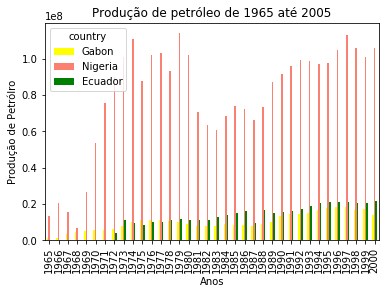

In [36]:
#Plotando o gráfico para a vizualização dos dados 
GNE_transpose.plot(kind='bar', color=('yellow', 'salmon', 'green'))
plt.ylabel('Produção de Petrólro')
plt.xlabel('Anos')
plt.title('Produção de petróleo de 1965 até 2005')

Como podemos ver para o Gabão, que entrou na OPEP em 1975 e saiu em 1994, participar do cartel não alterou a produção interna de petróleo. O país já passava por um aumento de produção e depois que entrou no cartel chegou ao seu pico diminuindo logo depois. Podemos ver também que, mesmo deixando o cartel em 1994, a produção depetróleo não é alterada. 

Para a Nigéria, que ingressou em 1971, podemos notar um alto crescimento na produção nos anos de 1972, 1973 e 1974. Porém, ao analizarmos o gráfico, nota-se que o país já apresentava um movimento alto de crescimento antes mesmo de entrar na OPEP. Sendo assim, não podemos chegar à uma conclusão se esse aumento foi ou não impulsionado pela participação na OPEP ou não. 

Em 1973 o Equador inicia a atuar como um membro da organização. Podemos notar um altíssimo aumento na prdução de petróleo nesse ano, que se manteve ao longo dos outros anos. O que talvez possa indicar que ingressar na OPEP o Equador buscou aumentar sua produção anual de petróleo. Porém, ao sair do cartel, em 1992, a produção continua a crescer em baixas taxas.   

**Será que a OPEP realmente era uma organização com representatividade no mercado produtivo de petróleo ao longo desses anos?**

Para analizar isso vamos fazer a análise da produção de petróleo em 1975 (primeiro ano em que todos os países escolhidos estavem dentro da OPEP) em comparação com os anos atuais

In [45]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_1975 = produtores_petroleo_idx2.loc[:,[1975, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 1975')

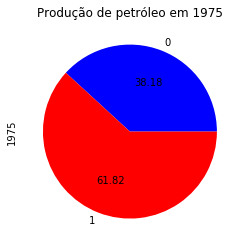

In [46]:
#Somando a produção de petróleo anual dos países
pie_1975 = OPEP_1975.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_1975[1975].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 1975')

**Comparando a representatividade da OPEP de 1975 com 1990 e com atualmente**

In [47]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_1990= produtores_petroleo_idx.loc[:,[1990, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 1990')

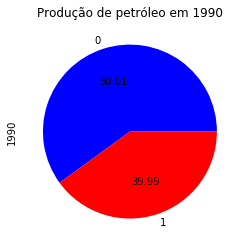

In [48]:
#Somando a produção de petróleo anual dos países
pie_1990 = OPEP_1990.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_1990[1990].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 1990')

In [49]:
#Recortando a tabela pegando apenas os países que desejados e retirando os valores nulos
OPEP_2016 = produtores_petroleo_idx3.loc[:,[2016, "opep"]].dropna()

Text(0.5, 1.0, 'Produção de petróleo em 2016')

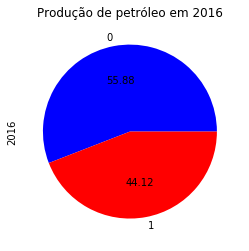

In [50]:
#Somando a produção de petróleo anual dos países
pie_2016 = OPEP_2016.groupby("opep").sum() 

#Plotando o gráfico para a visualização
pie_2016[2016].plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False)
plt.title('Produção de petróleo em 2016')

INSERIR ANÁLISE DOS GRÁFICOS

### Análise do IDH dos países

In [57]:
#Recortando a tabela pegando apenas os países que desejamos utilizar
IDH_1990 = idh_idx.loc[:,[1990, "opep"]].dropna()

IDH_2016 = idh_idx2.loc[:,[2016, "opep"]].dropna()

C:\Users\Roberto\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [ ]:
IDH_PP_1975 = OPEP_1975.join(IDH_1975, how='inner', lsuffix='_PIB', rsuffix='_petroleo')


pib_opep